In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import learning_curve
from time import time
from sklearn.metrics import r2_score

In [ ]:
data =  pd.read_csv('/content/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(data.isnull().any().sum(),'/', len(data.columns))
print(data.isnull().any(axis=1).sum(),'/', len(data))

0 / 21
0 / 21613


In [ ]:
df_train=data.copy()
df_train.rename(columns={'price':'SalePrice'}, inplace=True)

In [ ]:
df_train.head()

,id,date,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
feature = data.iloc[:,3:].columns.tolist()
target = data. iloc[:,2]. name

In [ ]:
correlations = {}
for f in feature:
  data_temp=data[[f, target]]
  x1 = data_temp[f].values
  x2 = data_temp[target].values
  key = f + 'vs' + target
  correlations [ key]= pearsonr(x1,x2,)[0]

In [ ]:
data_correlations=pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending = False).index]

,Value
sqft_livingvsprice,0.702035
gradevsprice,0.667434
sqft_abovevsprice,0.605567
sqft_living15vsprice,0.585379
bathroomsvsprice,0.525138
viewvsprice,0.397293
sqft_basementvsprice,0.323816
bedroomsvsprice,0.308350
latvsprice,0.307003
waterfrontvsprice,0.266369


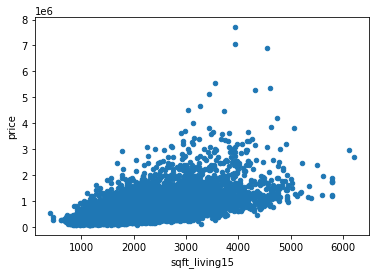

In [ ]:
var='sqft_living15'
data=pd.concat([data['price'], data[var]], axis=1)
data.plot.scatter(x=var, y='price')

(-0.5, 12.5, 0.0, 3500000.0)

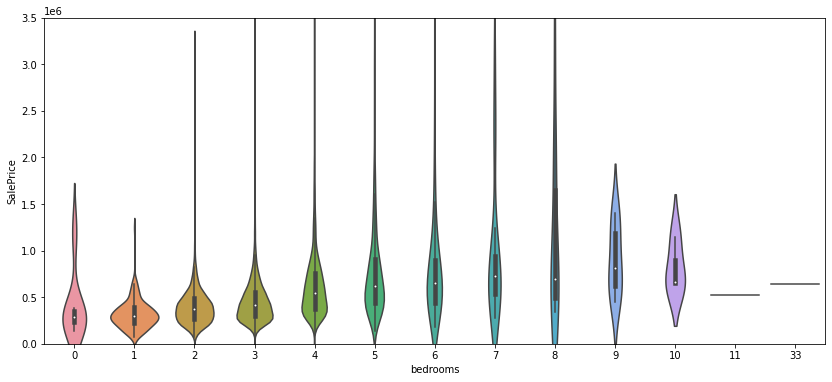

In [ ]:
var='bedrooms'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax =plt.subplots(figsize=(14,6))
fig= sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000)

(-0.5, 12.5, 0.0, 3500000.0)

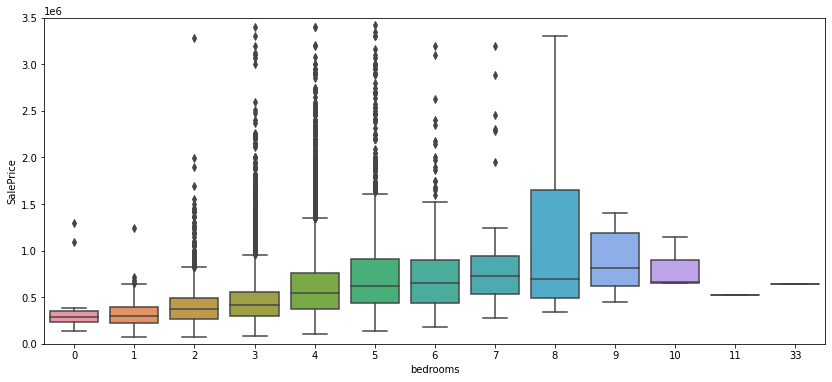

In [ ]:
var='bedrooms'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax =plt.subplots(figsize=(14,6))
fig= sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000)

In [ ]:
df_train.describe()

,id,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


(-0.5, 11.5, 0.0, 3500000.0)

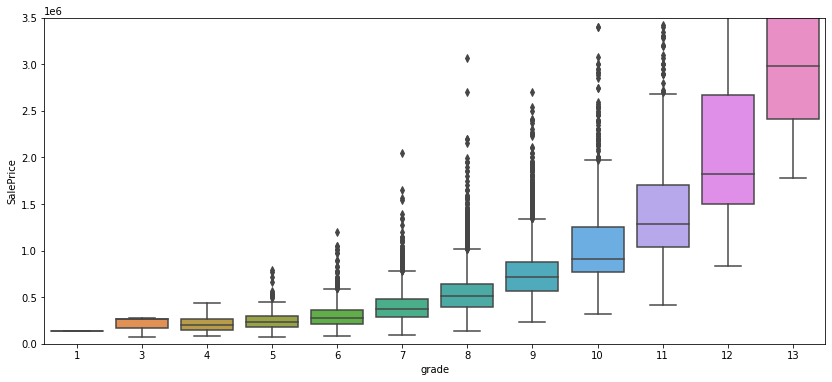

In [ ]:
var='grade'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax =plt.subplots(figsize=(14,6))
fig= sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000)

(-0.5, 11.5, 0.0, 3500000.0)

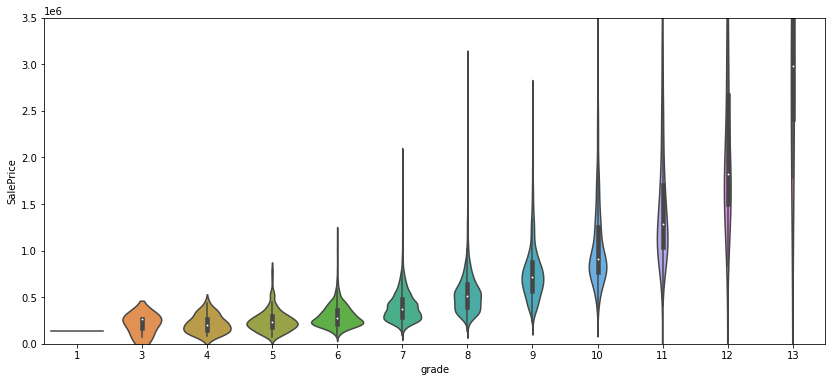

In [ ]:
var='grade'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax =plt.subplots(figsize=(14,6))
fig= sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000)

(-0.5, 1037.5, 0.0, 3500000.0)

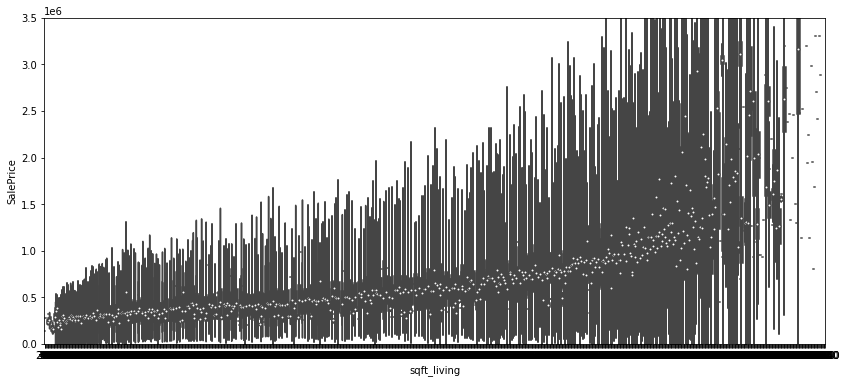

In [ ]:
var='sqft_living'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax =plt.subplots(figsize=(14,6))
fig= sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000)

(-372.5, 14202.5, 0.0, 3500000.0)

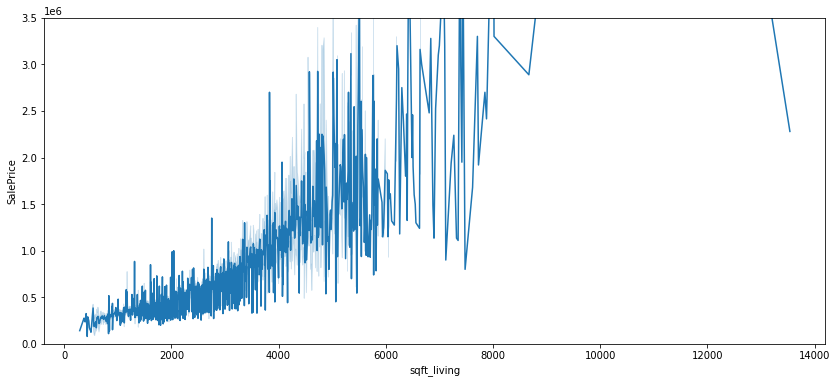

In [ ]:
var='sqft_living'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax =plt.subplots(figsize=(14,6))
fig= sns.lineplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000)

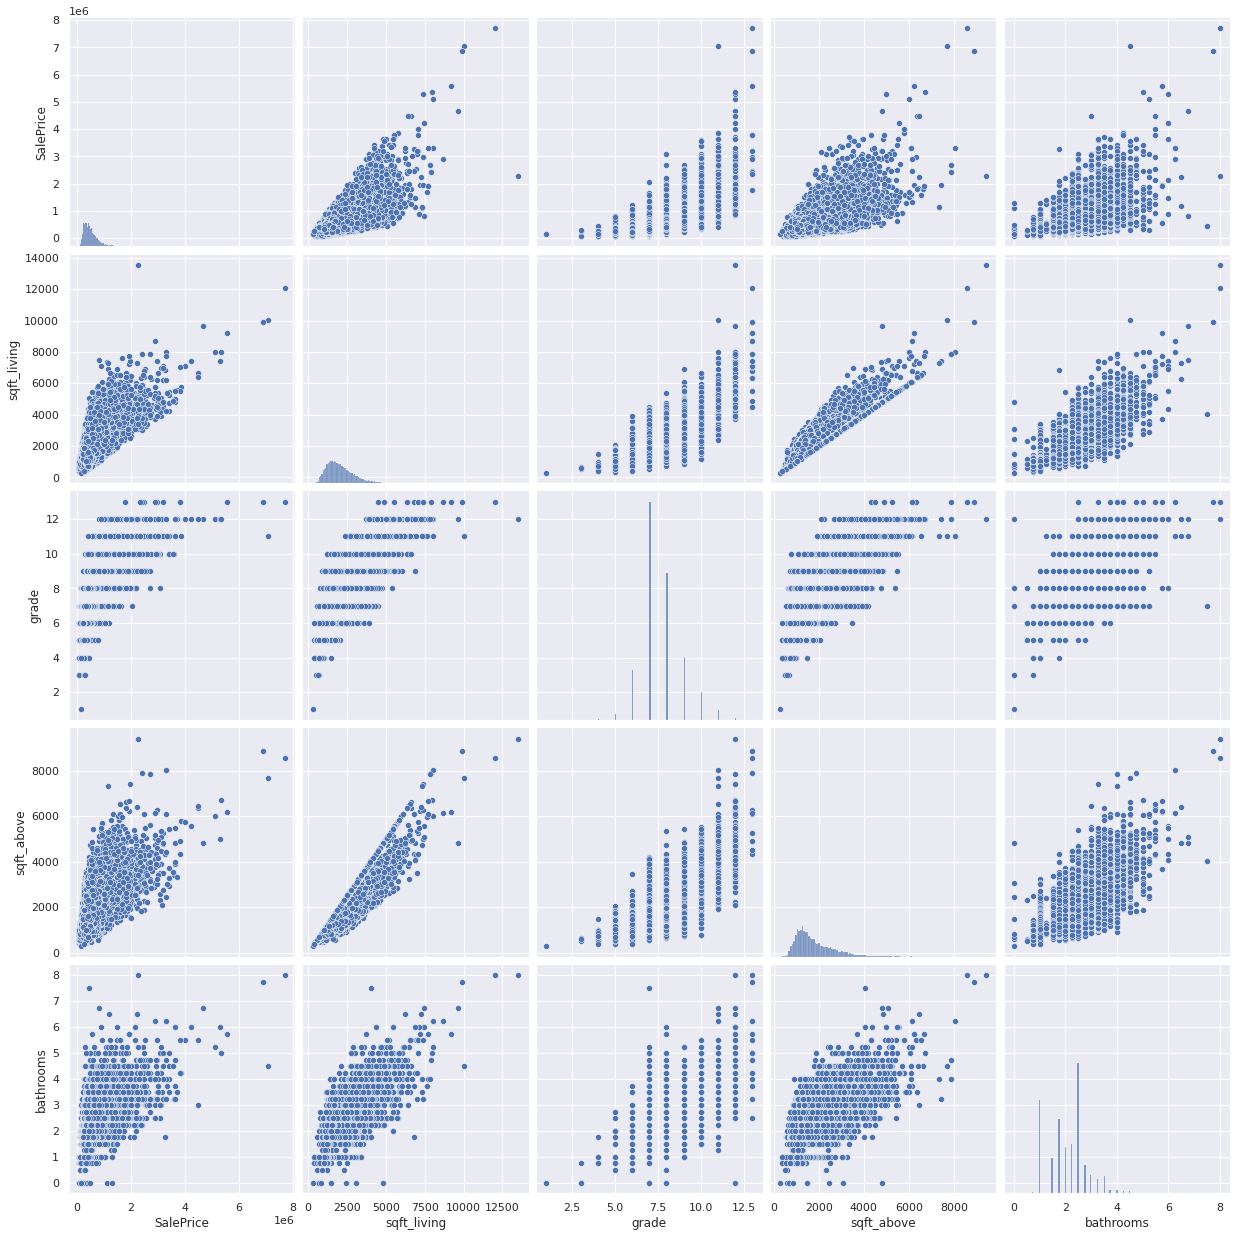

In [ ]:
sns.set()
cols = ['SalePrice', 'sqft_living', 'grade', 'sqft_above', 'bathrooms']
sns.pairplot(df_train[cols], height=3.5)
plt.show();

In [ ]:
new_data=df_train[['sqft_living15', 'sqft_living', 'grade', 'sqft_above', 'bathrooms']]
X = new_data.values
y=df_train.SalePrice.values

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_regr = RandomForestRegressor(n_estimators=500, random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end = time()
train_time_rand=end-start
random=rand_regr.score(X_test, y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions, y_test)
exp1= r2_score
print(train_time_rand , random, exp_rand,exp1)

24.868816375732422 0.613773583279815 0.4317826079816137 <function r2_score at 0x7f5953bfe050>


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est = GradientBoostingRegressor(n_estimators=500, max_depth=5, loss='ls', min_samples_split=1000)
end = time()
train_time_g=end-start
est.fit(X_train, y_train)
gradient=est.score(X_test, y_test)
pred = est.predict(X_test)
exp_est = explained_variance_score(pred, y_test)
exp2 = r2_score(predictions, y_test)
print(train_time_g, gradient, exp_est, exp2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


8.559226989746094e-05 0.6305315543119963 0.44956277570076497 0.43172187060245437


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
est = AdaBoostRegressor(n_estimators=50, learning_rate=0.5, loss='exponential').fit(X_train, y_train)
end = time()
train_time_g1=end-start
gradient1=est.score(X_test, y_test)
pred = est.predict(X_test)
exp_est1 = explained_variance_score(pred, y_test)
exp3 = r2_score(pred, y_test)
print(train_time_g1, gradient1, exp_est1, exp3)

0.8327970504760742 0.43028710398685055 0.43849145751534147 0.32371713384307665


In [ ]:
from xgboost import XGBRegressor
start = time()
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, loss='exponential').fit(X_train, y_train)
end = time()
train_time = end-start
grad=model.score(X_test, y_test)
pre = model.predict(X_test)
exp_model = explained_variance_score(pre, y_test)
exp4 = r2_score(pred, y_test)
print(train_time, grad, exp_model, exp4)

[20:09:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5.320257663726807 0.6252363567017025 0.41208154814605247 0.32371713384307665


In [ ]:
from sklearn.tree import DecisionTreeRegressor
start = time()
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)
end = time()
train_time_dt = end-start
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)
exp_reg_tree = explained_variance_score(reg_tree_pred, y_test)
exp5 = r2_score(reg_tree_pred, y_test)
print(train_time_dt, exp_reg_tree, exp5)

0.00011706352233886719 0.34117225145824337 0.3411655269085673


In [ ]:
from lightgbm import LGBMRegressor
start = time()
reg_tree = LGBMRegressor( learning_rate=0.4, max_depth=8)
end = time()
train_time_dt = end-start
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)
exp_reg_tree = explained_variance_score(reg_tree_pred, y_test)
exp = r2_score(reg_tree_pred, y_test)
print(train_time_dt, exp_reg_tree, exp)

0.00011944770812988281 0.34970611918348904 0.3496421351400224


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor
start = time()
reg_tree = CatBoostRegressor( learning_rate=0.4, max_depth=5)
end = time()
train_time_dt1 = end-start
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)
exp_reg_tree1 = explained_variance_score(reg_tree_pred, y_test)
exp7 = r2_score(reg_tree_pred, y_test)
print(train_time_dt1, exp_reg_tree1, exp7)

0:	learn: 299689.3035008	total: 50.2ms	remaining: 50.2s
1:	learn: 264614.7123469	total: 53.4ms	remaining: 26.7s
2:	learn: 248033.5553619	total: 56.7ms	remaining: 18.8s
3:	learn: 239844.4633520	total: 59.5ms	remaining: 14.8s
4:	learn: 234267.5880186	total: 62.6ms	remaining: 12.4s
5:	learn: 230226.1726790	total: 65.4ms	remaining: 10.8s
6:	learn: 227791.9514070	total: 68.4ms	remaining: 9.71s
7:	learn: 225757.2182744	total: 71.2ms	remaining: 8.82s
8:	learn: 224012.0852679	total: 73.9ms	remaining: 8.14s
9:	learn: 222338.1191442	total: 76.6ms	remaining: 7.58s
10:	learn: 221786.8487463	total: 79.6ms	remaining: 7.15s
11:	learn: 220134.5495863	total: 82.6ms	remaining: 6.8s
12:	learn: 219088.6347879	total: 85.4ms	remaining: 6.48s
13:	learn: 218376.9837497	total: 88.4ms	remaining: 6.22s
14:	learn: 217399.8516076	total: 91.9ms	remaining: 6.03s
15:	learn: 216612.6014114	total: 96ms	remaining: 5.91s
16:	learn: 216102.1235680	total: 103ms	remaining: 5.97s
17:	learn: 215447.6257286	total: 110ms	remain